In [1]:
import seaborn as sb
import pandas as pd
import numpy as np

## Read the shape feature data

In [2]:
filepath='G:\\My Drive\\NCSU_Research\\SAS-BAE_Project\\Codes\\Sweet Potato\\Potato 3D Shape Estimation\\OldCsvs\\sp_shapefeatures_may152020.csv'

In [3]:
df=pd.read_csv(filepath)
df.head()

,Title,AxialLength,TipLength,Curvature,CurvatuerCorrected,MaxDiameter,LWRatio,Tail1,Tail2,TailPct,...,Dist25,Dist26,Dist27,Dist28,Dist29,Dist30,Dist31,Clone,Cultivar,PlotNum
0,18NCGT0014HCR_BEAUREGARD_G2_2006_NIR_V1_O0329.TIF,5.678797,5.476555,1.036929,1.049038,3.361789,1.606014,0.014959,0.000000,0.002634,...,1.666261,1.820350,1.943416,2.037957,2.108094,2.151168,2.166104,Beauregard,Beauregard,2006.0
1,18NCGT0014HCR_BEAUREGARD_G2_2006_NIR_V1_O0330.TIF,6.133998,5.888515,1.041688,1.060840,1.728726,3.062197,0.062868,0.455366,0.084486,...,3.839933,4.034333,4.195250,4.324056,4.420594,4.480280,4.494655,Beauregard,Beauregard,2006.0
2,18NCGT0014HCR_BEAUREGARD_G2_2006_NIR_V1_O0331.TIF,8.281046,7.945041,1.042291,1.059904,3.034478,2.520659,0.093875,0.080086,0.021007,...,5.162636,5.367787,5.530945,5.648264,5.733553,5.785321,5.803075,Beauregard,Beauregard,2006.0
3,18NCGT0014HCR_BEAUREGARD_G2_2006_NIR_V1_O0332.TIF,6.210201,6.055572,1.025535,1.060114,3.198603,1.742272,0.016396,0.285959,0.048687,...,2.758509,2.922875,3.062529,3.175475,3.257587,3.307421,3.323729,Beauregard,Beauregard,2006.0
4,18NCGT0014HCR_BEAUREGARD_G2_2006_NIR_V1_O0333.TIF,7.525784,7.154306,1.051924,1.068856,2.715011,2.580067,0.019271,0.019271,0.005121,...,4.872829,5.088827,5.256542,5.376783,5.463988,5.516837,5.535205,Beauregard,Beauregard,2006.0


## Filter Sweetpotatoes from Kinston
We used this code to identify unique plots in Kinston

In [5]:
tmp=df
tmp=tmp[tmp.Location=='Kinston']
r=tmp.PlotNum.unique()
r=r[~np.isnan(r)]
m=[int(x) for x in r]


## Selecting a subset of features

In [6]:
df=df[['Title','Location','CurvatuerCorrected','Cultivar','MaxDiameter','LWRatio','TailPct']]


In [7]:
df=df.rename(columns={"CurvatuerCorrected": "Curvature"})

## Filtering certain cultivars

In [8]:
cultivars= ['Beauregard','Bellevue','Burgundy','Covington']
pattern='|'.join(cultivars)
df=df[df.Location=='Clinton']

In [9]:
df.shape

(6888, 7)

List of cultivars in our data

In [10]:
df['Cultivar'].unique()

array(['Beauregard', 'Bellevue', 'Burgundy', 'Covington', 'L13-81',
       'L13-84', 'L417', 'L445', 'NC04-0531', 'NC05-0198', 'NC09-0122C1',
       'NC10-0118M25', 'Orleans', 'NC10-0118M28_G2', nan, 'Orleans_G2',
       'Covington_G2', 'Beauregard_G2', 'NC15-0185', 'NC08-0036',
       'NC10-0118M28'], dtype=object)

In [13]:
df=df[df.Cultivar.str.contains(pattern)==True]
sb.set(font_scale=1,font='Arial')
sb.set_style("white")

In [12]:
df.shape

(6888, 7)

In [15]:
df=df.replace('Beauregard_G2', 'Beauregard')
df=df.replace('Covington_G2', 'Covington')

## Visualize feature distribution
Plotting features across the four selected cultivars

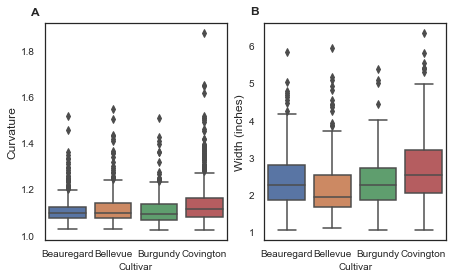

In [16]:
import matplotlib.pyplot as plt

df=df.replace('Beauregard_G2', 'Beauregard')
df=df.replace('Covington_G2', 'Covington')
df.Cultivar.unique()

f, axes = plt.subplots(1, 2,figsize = (7.2,4))

plt.rcParams["axes.labelsize"] = 9

sb.boxplot(x='Cultivar',y='Curvature',data=df,ax=axes[0])
sb.boxplot(x='Cultivar',y='MaxDiameter',data=df,ax=axes[1])
axes[1].set( ylabel='Width (inches)')

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=10)

for tick in axes[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in axes[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in axes[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in axes[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


#f.set_size_inches(5,4)
axes[0] .text(-0.8,1.95,'A', fontsize=12,fontweight='bold')
axes[1] .text(-0.8,6.85,'B', fontsize=12,fontweight='bold')
plt.savefig('cultivar_sp_features.eps', 
           transparent=False)


Ploting Weigths of Sweetpotaotoes 

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv('Supporting File 3.csv')
df["Weight"]=df["Volume"]*15.6425
plt.rcParams["axes.labelsize"] = 9

s=sb.boxplot(x='Shape',y='Weight',data=df)

#sb.boxplot(x='Cultivar',y='MaxDiameter',data=df,ax=axes[1])
#axes[1].set( ylabel='Width (inches)')
fig = plt.gcf()
fig.set_size_inches(2.5,2.5)
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=10)
axes = plt.gca()
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.ylabel('Weight (grams)', fontsize=12)
plt.xlabel('Shape', fontsize=12)
#f.set_size_inches(5,4)
#axes[0] .text(-0.8,1.95,'A', fontsize=12,fontweight='bold')
#axes[1] .text(-0.8,6.85,'B', fontsize=12,fontweight='bold')
plt.savefig('cultivar_weight_features.eps', 
           transparent=False)
